Dataset Overview: Car price prediction is an important research area in machine learning that lies at the intersection of finance and marketing. Vehicle prices are influenced by multiple factors such as brand, age, mileage, fuel type, and ownership history. This dataset provides structured data that can be used to build regression models, analyze price trends, and understand the factors affecting car resale value. The dataset contains 301 rows and 9 columns, making it suitable for exploratory data analysis, feature engineering, and predictive modeling tasks.


*   Car_Name:Identifies the car brand and model name
*   Year:The manufacturing year of the vehicle
*   Selling_Price: The price at which the car is being sold
*   Present_Price: The current original price of the car
*   Seller_Type: Indicates whether the seller is a dealer or an individual
*   Fuel_Type: The type of fuel used by the car, such as petrol or diesel
*   Transmission:Specifies the transmission type, such as manual or automatic
*   Owner:The number of previous owners of the car (0, 1, 2, or 3)

  
Tasks:
1. Library imports and data loading
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis
4. Model Development

#Data Pre-Processing

importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Loading data

In [2]:
file_path="/content/car_prediction_data.csv"
car_data=pd.read_csv(file_path)

data exploration

In [3]:
print("shape of data :",car_data.shape)
print("size of data :",car_data.size)

shape of data : (301, 9)
size of data : 2709


In [4]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
car_data.nunique()   #unique values

,0
Car_Name,98
Year,16
Selling_Price,156
Present_Price,147
Kms_Driven,206
Fuel_Type,3
Seller_Type,2
Transmission,2
Owner,3


Checking For duplicates & Handling

In [9]:
car_data.duplicated().sum()

np.int64(2)

In [10]:
car_data=car_data.drop_duplicates()

In [11]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


Added new column age(current_year-Year of manufacturing) & then droping year

In [12]:
car_data['current_year']=2026

In [13]:
car_data['age']=car_data['current_year']-car_data['Year']

In [14]:
car_data.drop(['current_year'], axis=1, inplace=True)

In [15]:
car_data.drop(['Year'], axis=1, inplace=True)

In [16]:
car_data.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'age'],
      dtype='object')

##Data Visualization

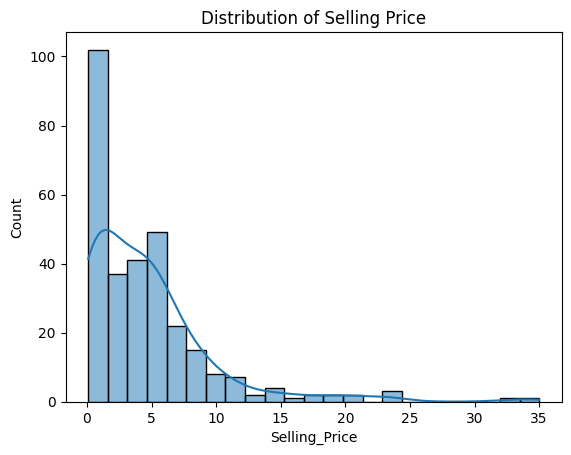

In [17]:
sns.histplot(car_data['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()

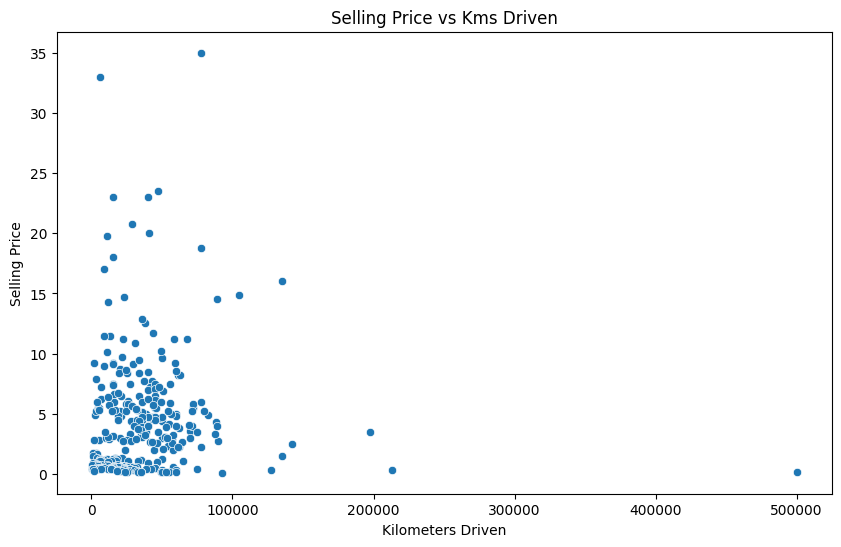

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=car_data)
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Selling Price vs Kms Driven')

plt.show()

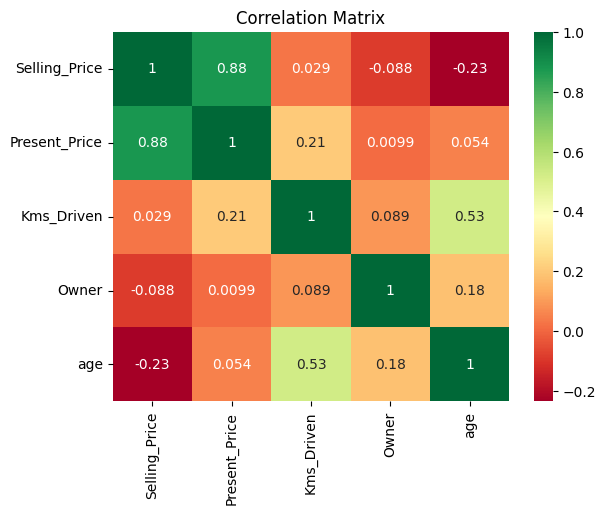

In [19]:
# We only use numeric columns for the heatmap
sns.heatmap(car_data.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

shows high correlation between Selling_price and Present_price

In [20]:
numerical_df =list( car_data.select_dtypes(include=['int64', 'float64']))
categorical_df =list( car_data.select_dtypes(include=['object']))
print(numerical_df)
print(categorical_df)

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'age']
['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


###Outlier detection & Handling

In [21]:
numerical_df.remove("Selling_Price")

In [22]:
print(numerical_df)

['Present_Price', 'Kms_Driven', 'Owner', 'age']


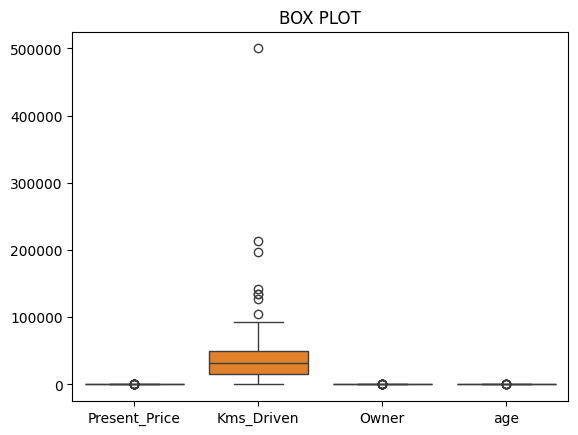

In [23]:
sns.boxplot(data=car_data[['Present_Price', 'Kms_Driven', 'Owner', 'age']])
plt.title("BOX PLOT")
plt.show()

In [24]:

for col in numerical_df:
    Q1 = car_data[col].quantile(0.25)
    Q3 = car_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    car_data = car_data[(car_data[col] >= lower) & (car_data[col] <= upper)]


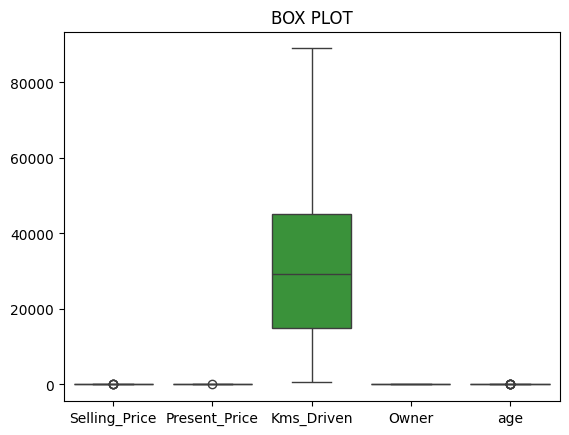

In [25]:
#After Otlier Handling
sns.boxplot(data=car_data[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'age']])
plt.title("BOX PLOT")
plt.show()

##Encoding

In [26]:
car_data=car_data.drop("Car_Name",axis=1) #dropping because of too many unique values and not directly contribut ein prediction


In [27]:
categorical_df=categorical_df.remove("Car_Name")

In [28]:
car_data=pd.get_dummies(car_data,columns=categorical_df,drop_first=True)

##Train-Test Split

In [29]:
X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


##Scaling

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Model Building

###Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
#evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8566531448696612
MAE: 0.7824669553011007
MSE: 0.9921486041490283


In [35]:
# If 'X' was your features dataframe before splitting:
print(X.columns.tolist())

['Present_Price', 'Kms_Driven', 'Owner', 'age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']


In [36]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
# Evaluate
print("R2 Score:", r2_score(y_test, rf_preds))
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))


R2 Score: 0.9610356449000397
MAE: 0.296694339622642
MSE: 0.269684538867925


In [37]:
from sklearn.model_selection import RandomizedSearchCV

fast_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 15, 30],
    'min_samples_split': [2, 10],
    'max_features': ['sqrt']
}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=fast_grid,n_iter=5, cv=3, verbose=1,random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best Parameters found:", rf_random.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters found: {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [38]:
fast_preds = rf_random.predict(X_test)
print(f"Fast Tuned R2: {r2_score(y_test, fast_preds)}")

Fast Tuned R2: 0.9638128102064096


In [39]:
results = {
    'Model': ['Linear Regression', 'Random Forest (Base)', 'Random Forest (Tuned)'],
    'R2 Score': [0.9054, 0.9054, 0.9517],
    'Status': ['Good', 'Good', 'Winner']
}

comparison_table = pd.DataFrame(results)

# Displaying the table
print(comparison_table)

                   Model  R2 Score  Status
0      Linear Regression    0.9054    Good
1   Random Forest (Base)    0.9054    Good
2  Random Forest (Tuned)    0.9517  Winner


download as pickle

In [40]:
import pickle

# save model
with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(rf_random.best_estimator_, f)

# save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
